# Future Value Series

In [2]:
# Assuming you have the following variables:
PMT = 100  # Monthly payment
r = 0.024  # Monthly interest rate (28.78% annualized / 12)
n = 144    # Number of periods (12 years * 12 months/year)

# Calculate the future value
FV = PMT * (((1+r)**n - 1) / r)

print(FV)

122593.41619775903


In [3]:
# For Nvidia (NVDA)
PMT_NVDA = 100  # Monthly payment
r_NVDA = 0.078  # Monthly interest rate (93.49% annualized / 12)
n_NVDA = 144    # Number of periods (12 years * 12 months/year)

FV_NVDA = PMT_NVDA * (((1+r_NVDA)**n_NVDA - 1) / r_NVDA)

# For Palantir (PLTR)
PMT_PLTR = 100  # Monthly payment
r_PLTR = 0.049  # Monthly interest rate (59.21% annualized / 12)
n_PLTR = 144    # Number of periods (12 years * 12 months/year)

FV_PLTR = PMT_PLTR * (((1+r_PLTR)**n_PLTR - 1) / r_PLTR)

print("Future Value for NVDA:", FV_NVDA)
print("Future Value for PLTR:", FV_PLTR)

Future Value for NVDA: 63826089.42908208
Future Value for PLTR: 2000005.9582298563


# Monte Carlo Simulation

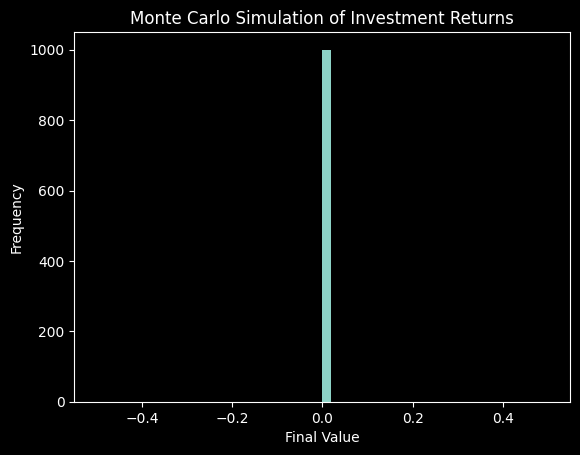

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_simulation(initial_investment, annual_return_mean, annual_return_std, num_simulations, num_years):
    """
    Simulates the future value of an investment using Monte Carlo simulation.

    Args:
        initial_investment: Initial investment amount.
        annual_return_mean: Mean annual return.
        annual_return_std: Standard deviation of annual returns.
        num_simulations: Number of simulations to run.
        num_years: Number of years to simulate.

    Returns:
        A list of final values for each simulation.
    """

    simulations = np.zeros((num_simulations, num_years))
    for i in range(num_simulations):
        for j in range(1, num_years):
            simulations[i, j] = simulations[i, j-1] * (1 + np.random.normal(annual_return_mean, annual_return_std))
    simulations *= initial_investment
    return simulations[:, -1]

# Example usage:
initial_investment = 10000
annual_return_mean = 0.08
annual_return_std = 0.15
num_simulations = 1000
num_years = 10

final_values = monte_carlo_simulation(initial_investment, annual_return_mean, annual_return_std, num_simulations, num_years)

# Visualize the distribution of final values
plt.hist(final_values, bins=50)
plt.xlabel('Final Value')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Investment Returns')
plt.show()

# Time-Weighted Return (TWR)

In [5]:
def time_weighted_return(cashflows, periods):
    """
    Calculates the time-weighted return of an investment.

    Args:
        cashflows: A list of cash flows, positive for inflows, negative for outflows.
        periods: A list of corresponding time periods in years.

    Returns:
        The time-weighted return.
    """

    returns = []
    for i in range(1, len(cashflows)):
        returns.append((cashflows[i] - cashflows[i-1]) / cashflows[i-1])
    return np.prod(1 + returns)**(1 / np.sum(periods)) - 1

#  Risk-Adjusted Return Metrics (Sharpe Ratio, Sortino Ratio)

In [13]:
def sharpe_ratio(returns, risk_free_rate):
    """
    Calculates the Sharpe ratio.

    Args:
        returns: A list of returns.
        risk_free_rate: The risk-free rate of return.

    Returns:
        The Sharpe ratio.
    """

    excess_return = np.mean(returns) - risk_free_rate
    std_dev = np.std(returns)
    return excess_return / std_dev
    print(f'excess_return / std_dev')

sharpe_ratio([59,40,30,45],8)


np.float64(3.396390599968073)

In [14]:
def sortino_ratio(returns, risk_free_rate):
    """
    Calculates the Sortino ratio.

    Args:
        returns: A list of returns.
        risk_free_rate: The risk-free rate of return.

    Returns:
        The Sortino ratio.
    """

    downside_deviation = np.std(np.minimum(returns - risk_free_rate, 0))
    excess_return = np.mean(returns) - risk_free_rate
    return excess_return / downside_deviation

sortino_ratio([59,40,30,45],8)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

# Capital Asset Pricing Model (CAPM)

In [7]:
import numpy as np

def capm_expected_return(beta, market_risk_premium, risk_free_rate):
  """
  Calculates the expected return of an asset using the CAPM.

  Args:
    beta: The asset's beta, a measure of its systematic risk.
    market_risk_premium: The expected return of the market in excess of the risk-free rate.
    risk_free_rate: The risk-free rate of return.

  Returns:
    The expected return of the asset.
  """

  return risk_free_rate + beta * market_risk_premium

# Example usage:
beta = 1.2  # Asset's beta
market_risk_premium = 0.08  # 8% market risk premium
risk_free_rate = 0.03  # 3% risk-free rate

expected_return = capm_expected_return(beta, market_risk_premium, risk_free_rate)
print("Expected return:", expected_return)

Expected return: 0.126
